In [2]:
import numpy as np
import pandas as pd

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [4]:
data = pd.read_csv('songdata.csv')

In [5]:
data.shape

(57650, 4)

In [ ]:
data.head()

,artist,song,link,text
0,ABBA,Ahe's My Kind Of Girl,/a/abba/ahes+my+kind+of+girl_20598417.html,"Look at her face, it's a wonderful face \nAnd..."
1,ABBA,"Andante, Andante",/a/abba/andante+andante_20002708.html,"Take it easy with me, please \nTouch me gentl..."
2,ABBA,As Good As New,/a/abba/as+good+as+new_20003033.html,I'll never know why I had to go \nWhy I had t...
3,ABBA,Bang,/a/abba/bang_20598415.html,Making somebody happy is a question of give an...
4,ABBA,Bang-A-Boomerang,/a/abba/bang+a+boomerang_20002668.html,Making somebody happy is a question of give an...


In [ ]:
vectorizer = TfidfVectorizer(analyzer='word', stop_words='english')


In [ ]:
X = vectorizer.fit_transform(data['text'])


In [ ]:
query = "Take it easy with me"
query_vec = vectorizer.transform([query])


In [ ]:
results = cosine_similarity(X, query_vec).reshape((-1,))

In [ ]:
print(results)

[0.         0.01778747 0.         ... 0.         0.         0.        ]


In [ ]:
for i in results.argsort()[-10:][::-1]:
  print(data.iloc[i,0],"--",data.iloc[i,1])

Linda Ronstadt -- It's So Easy (To Fall In Love)
Kiss -- Easy As It Seems
Lorde -- Easy
Eric Clapton -- It's Easy
Guns N' Roses -- It's So Easy
Rolling Stones -- It's Not Easy
Linda Ronstadt -- It's So Easy
Frank Zappa -- Easy Meat
Ne-Yo -- Make It Easy
Kiss -- Easy Thing


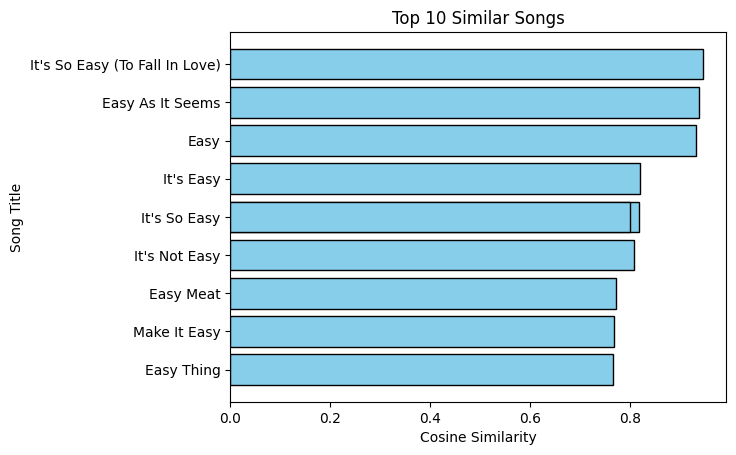

In [ ]:
import matplotlib.pyplot as plt

top_indices = results.argsort()[-10:][::-1]
top_scores = results[top_indices]
top_titles = data.iloc[top_indices, 1]

plt.barh(top_titles, top_scores, color='skyblue', edgecolor='black')
plt.gca().invert_yaxis()
plt.xlabel('Cosine Similarity')
plt.ylabel('Song Title')
plt.title('Top 10 Similar Songs')
plt.show()


In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
import pickle


# load the dataset

data = pd.read_csv('songdata.csv')


#Vectorize the text column

vectorizer = TfidfVectorizer(analyzer='word',stop_words='english')
tfidf_matrix = vectorizer.fit_transform(data['text'])


#save the vectorizer and tfidf matrix
with open('model/tfidf_vectorizer.pkl','wb') as f:
    pickle.dump(vectorizer, f)
with open('model/tfidf_matrix.pkl', 'wb') as f:
    pickle.dump(tfidf_matrix, f)

In [11]:
pip install nltk

In [15]:
import pandas as pd

# Load the dataset
data = pd.read_csv('songdata.csv')

# Combine 'title', 'artist', and 'text' into a single string, lowercased
data['tags'] = (data['song'].str.lower() + " " +
                data['artist'].str.lower() + " " +
                data['text'].str.lower())

# Show the first few rows of the dataset
print(data.head())


  artist                   song                                        link  \
0   ABBA  Ahe's My Kind Of Girl  /a/abba/ahes+my+kind+of+girl_20598417.html   
1   ABBA       Andante, Andante       /a/abba/andante+andante_20002708.html   
2   ABBA         As Good As New        /a/abba/as+good+as+new_20003033.html   
3   ABBA                   Bang                  /a/abba/bang_20598415.html   
4   ABBA       Bang-A-Boomerang      /a/abba/bang+a+boomerang_20002668.html   

                                                text  \
0  Look at her face, it's a wonderful face  \nAnd...   
1  Take it easy with me, please  \nTouch me gentl...   
2  I'll never know why I had to go  \nWhy I had t...   
3  Making somebody happy is a question of give an...   
4  Making somebody happy is a question of give an...   

                                                tags  
0  ahe's my kind of girl abba look at her face, i...  
1  andante, andante abba take it easy with me, pl...  
2  as good as new abba 

In [16]:
import nltk
from nltk.tokenize import word_tokenize
from gensim.models import Word2Vec

# Ensure NLTK tokenizer is available
nltk.download('punkt_tab')

# Tokenize the 'tags' field
data['tokens'] = data['tags'].apply(lambda x: word_tokenize(x))

# Train the Word2Vec model
model = Word2Vec(data['tokens'], vector_size=100, window=5, min_count=1, workers=4)

# Test: print the vector for a word (e.g., 'love')
print(model.wv['love'])


[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


[-3.0401118  -0.99168855  0.40140578 -1.3224481   1.7040854  -1.8753844
 -1.1629184   2.0956585   1.3200724  -0.42429444  0.23391108  0.53888506
 -2.1162264   2.3775618   1.8986623  -2.273752    0.99711365  1.311678
  1.5369116  -0.14142677  0.3899919  -0.79125506 -1.1331302  -1.2961767
 -1.556437    4.7265105  -1.406691   -0.940837    4.838857   -1.1844642
  2.4189732   1.8093891  -3.1249382  -0.56343484  1.4430424  -0.70769334
  2.2376385   0.3882107   0.3050132  -0.21421681  2.327828    0.86631256
  1.3142915  -1.3886015  -0.5664674  -1.4461311  -1.4450636  -0.50614846
  2.7201672  -1.4239755  -2.92223     1.1181877   1.2295845  -0.0095689
 -1.2921193  -0.6068125   0.28083965 -0.10349649  2.5837257  -0.30613494
  1.2519156  -2.0401564   0.71030337 -0.826163   -0.51104534 -4.349272
  1.8250818   1.6225104   0.5703217   0.8477792  -0.47403848  0.3698882
 -3.584797    0.5789798  -0.441706    0.7924758  -0.3406499  -0.87664586
 -2.6933098   0.530423   -1.4837593  -1.2044045   1.0323217 

In [17]:
import sqlite3
import json
import numpy as np

# Connect to SQLite database (it will create the file if it doesn't exist)
conn = sqlite3.connect('songdata.db')
cursor = conn.cursor()

# Create the songs table
cursor.execute('''
CREATE TABLE IF NOT EXISTS songs (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    song TEXT,
    artist TEXT,
    text TEXT,
    tags TEXT,
    tag_vector TEXT
)
''')

# Function to convert vector to JSON string for storage
def vector_to_json(vector):
    return json.dumps(vector.tolist())

# Insert song data along with vectors into the SQLite database
for _, row in data.iterrows():
    # Get the vector for the 'tags' field (average of the word vectors for the tokens)
    tag_vector = np.mean([model.wv[token] for token in row['tokens'] if token in model.wv], axis=0)

    # Convert the vector to a JSON string
    tag_vector_json = vector_to_json(tag_vector)

    # Insert the song data
    cursor.execute('''
    INSERT INTO songs (song, artist, text, tags, tag_vector)
    VALUES (?, ?, ?, ?, ?)
    ''', (row['song'], row['artist'], row['text'], row['tags'], tag_vector_json))

# Commit the transaction
conn.commit()


In [18]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

# Fetch all songs and their tag vectors from the SQLite database
cursor.execute('SELECT song, artist, text, tags, tag_vector FROM songs')
songs_data = cursor.fetchall()

# Convert the tag_vector from JSON string to a numpy array
song_vectors = []
songs = []
for song in songs_data:
    song_title, artist, text, tags, tag_vector_json = song
    tag_vector = json.loads(tag_vector_json)  # Deserialize the vector from JSON string
    song_vectors.append(tag_vector)
    songs.append({'title': song_title, 'artist': artist, 'text': text, 'tags': tags})

# Convert the list of vectors into a numpy array for cosine similarity calculation
song_vectors = np.array(song_vectors)

# Function to search for the most similar songs
def search_similar_songs(query, top_n=10):
    # Tokenize the query
    query_tokens = word_tokenize(query.lower())  # Lowercased query and tokenize
    query_vector = np.mean([model.wv[token] for token in query_tokens if token in model.wv], axis=0)

    if query_vector is None:
        print("No valid tokens found in the query.")
        return

    # Compute cosine similarity between the query vector and the song vectors
    similarities = cosine_similarity([query_vector], song_vectors).flatten()

    # Get the top N most similar songs
    top_indices = similarities.argsort()[-top_n:][::-1]
    for idx in top_indices:
        song = songs[idx]
        print(f"Song: {song['title']} | Artist: {song['artist']} | Similarity: {similarities[idx]:.4f}")

# Test the search with a query
query = "Take it easy with me"
search_similar_songs(query)

# Close the database connection
conn.close()


Song: Easy Slow | Artist: Nitty Gritty Dirt Band | Similarity: 0.8987
Song: Easy Come, Easy Go | Artist: Elvis Presley | Similarity: 0.8981
Song: Easy | Artist: Lorde | Similarity: 0.8920
Song: Easy Rider | Artist: Chris Rea | Similarity: 0.8918
Song: Take It Easy | Artist: Jackson Browne | Similarity: 0.8879
Song: Easy, Come On | Artist: Kris Kristofferson | Similarity: 0.8877
Song: Talk To Me | Artist: Nirvana | Similarity: 0.8865
Song: Can't Take It With You | Artist: Allman Brothers Band | Similarity: 0.8854
Song: Let Me Go Easy | Artist: Indigo Girls | Similarity: 0.8849
Song: Take It All | Artist: Adele | Similarity: 0.8824
